# Análisis Exploratorio de Datos (EDA)

## 1. El problema del negocio

Una start-up que provee servicios de agregación de plataformas de streaming solicita la realización en todas sus etapas de **<span style="color:darkgreen">un sistema de recomendación de películas</span>**, para este proyecto fué suministrado al **Data Scientist** un conjunto de archivos en formatos **.csv y excel** los cuales requirienro un trabajo conciente de [E.T.L](ETL-(Extract-Transform-Load).ipynb). el cual encontrará siguiendo el enlace 

## 2. El set de datos después de la limpieza

La información una vez procesada se encuentra en un CSV (`movies_cleaned.csv`) con 43.641 filas y 16 columnas.

Cada registro contiene xx características lLas columnas son las siguientes:
1. **belongs_to_collection**: Franquicia o serie de películas a la que pertenece la película.
2. **budget**: El presupuesto de la película, en dólares.
3. **genres**: Una lista que indica todos los géneros asociados a la película.
4. **id**: ID de la pelicula.
5. **original_language**: Codigo ISO639 del idioma original en la que se grabo la pelicula.
6. **overview**: Resumen de la película.
7. **production_companies**: Lista con las compañias productoras asociadas a la película.
8. **production_countries**: Lista con los países donde se produjo la película.
9. **release_date**: Fecha de estreno de la película.
10. **revenue**: Recaudación de la pelicula, en dolares (Tambien se toma como Ganancia para fines de éste trabajo).
11. **runtime**: Duración de la película, en minutos.
12. **title**: Titulo de la pelicula.
13. **cast**: Personal artístico protagónico de la película.
14. **director**: Nombre del director de la película.
15. **return**: Proporción de retorno de inversión.
16. **release_year**: Año de estreno de la película.


## 3. Lectura del dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

from ast import literal_eval

[nltk_data] Downloading package stopwords to /home/cnd-
[nltk_data]     sen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cnd-sen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Lectura
path = "datasets/movies_cleaned.csv"
data = pd.read_csv(path)

In [3]:
print(data.shape)
data.head()

(43641, 16)


,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,title,cast,director,return,release_year
0,toy story collection,30000000.0,"['animation', 'comedy', 'family']",862,en,"Led by Woody, Andy's toys live happily in his ...",['pixar animation studios'],['united states of america'],1995-10-30,373554033.0,81.0,Toy Story,"['tom hanks', 'tim allen', 'don rickles', 'jim...",John Lasseter,12.451801,1995
1,no collection,65000000.0,"['adventure', 'fantasy', 'family']",8844,en,When siblings Judy and Peter discover an encha...,"['tristar pictures', 'teitler film', 'intersco...",['united states of america'],1995-12-15,262797249.0,104.0,Jumanji,"['robin williams', 'jonathan hyde', 'kirsten d...",Joe Johnston,4.043035,1995
2,grumpy old men collection,0.0,"['romance', 'comedy']",15602,en,A family wedding reignites the ancient feud be...,"['warner bros.', 'lancaster gate']",['united states of america'],1995-12-22,0.0,101.0,Grumpier Old Men,"['walter matthau', 'jack lemmon', 'ann-margret...",Howard Deutch,0.000000,1995
3,no collection,16000000.0,"['comedy', 'drama', 'romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",['twentieth century fox film corporation'],['united states of america'],1995-12-22,81452156.0,127.0,Waiting to Exhale,"['whitney houston', 'angela bassett', 'loretta...",Forest Whitaker,5.090760,1995
4,father of the bride collection,0.0,['comedy'],11862,en,Just when George Banks has recovered from his ...,"['sandollar productions', 'touchstone pictures']",['united states of america'],1995-02-10,76578911.0,106.0,Father of the Bride Part II,"['steve martin', 'diane keaton', 'martin short...",Charles Shyer,0.000000,1995


## 4. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas para encontrar las mejores prácticas para lograr un sistema de recomendación de películas exitoso y confiable.

### 4.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [4]:
# Verificar la información general del set de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43641 entries, 0 to 43640
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  43641 non-null  object 
 1   budget                 43641 non-null  float64
 2   genres                 43641 non-null  object 
 3   id                     43641 non-null  int64  
 4   original_language      43641 non-null  object 
 5   overview               43641 non-null  object 
 6   production_companies   43641 non-null  object 
 7   production_countries   43641 non-null  object 
 8   release_date           43641 non-null  object 
 9   revenue                43641 non-null  float64
 10  runtime                43641 non-null  float64
 11  title                  43641 non-null  object 
 12  cast                   43641 non-null  object 
 13  director               43641 non-null  object 
 14  return                 43641 non-null  float64
 15  re

In [5]:
# Verificar algunas variables estadísticas descriptivas básicas
data.describe()

,budget,id,revenue,runtime,return,release_year
count,4.364100e+04,43641.000000,4.364100e+04,43641.000000,4.364100e+04,43641.000000
mean,4.392429e+06,105551.922321,1.166978e+07,95.452648,6.862830e+02,1991.631493
std,1.776015e+07,111074.305613,6.561732e+07,36.563856,7.616350e+04,24.199281
min,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,25587.000000,0.000000e+00,86.000000,0.000000e+00,1978.000000
50%,0.000000e+00,57536.000000,0.000000e+00,95.000000,0.000000e+00,2001.000000
75%,0.000000e+00,149154.000000,0.000000e+00,107.000000,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,2.787965e+09,1256.000000,1.239638e+07,2020.000000


### Análisis básico de los Datos

* DataFrame: `data`
    * Cantidad de Filas: 43641
    * Cantidad de Columnas: 16
    * Tipos de datos: float64(4), int64(2), object(10)
    * Uso en memoria: 5.3+ MB
    * No existen valores faltantes.
    * El presupuesto Promedio se ubica en 4.39 Millones de Dolares.
        * Esta información pudiese ser engañosa ya que en el ETL por requerimientos en el enunciado del problema se imputaron los valores faltantes con `0` ésto seguramente introdujo un error en la configuración de los datos, de echo se observa que desde el minimo hasta  el cuartil 3 (75%) el valor es cero (0) esta data según mi percepción no es confiable. El problema se pudo abordar desde otra optica como por ejemplo realizando una investigación para obtener valores mas cercanos a la realidad partiendo de la premisa de `Todo proyecto por pequeño que sea se requiere de un presupuesto mínimo` por ejemplo tomando al azar la pelicula "Grumpier_Old_Men" y realizando una consulta muy básica se encontró un presupuesto aproximado de [Grumpier_Old_Men](https://www.omdb.org/es/us/movie/11520-grumpy-old-men). En los casos donde no se pudiera ubicar el presupuesto podria ponderarse este tomando en cuenta el promedio de los presupuestos de peliculas en el año de su realización. Esta investigación no se llevó a cabo por que la forma de imputación de los valores estaba extrictamente indicada en el enunciado y además no afecta la realización del proyecto principal que es la elaboración de un sistema de recomendaciones.
    * Ingresos promedio es de 11.67 Millones de Dolares.
        * El razonamiento para este punto es igual que el anterior.

### Analisis de feature genres (genero de la película)

In [6]:
# Adecuamos los datos para el análisis
data['genres'] = data['genres'].apply(literal_eval)
data = data.explode('genres')

In [7]:
data['genres'].sample(5)

24515     horror
15069    romance
27424      drama
19121    history
1580      action
Name: genres, dtype: object

In [8]:
# Vizualizar cuantos datos y su porcentaje del total por genero
count = data['genres'].value_counts()
percent = 100 * data['genres'].value_counts(normalize=True)
pd.DataFrame({'count': count, 'percent': percent.round(1)})

,count,percent
genres,,
drama,19876,22.3
comedy,12654,14.2
thriller,7536,8.5
romance,6619,7.4
action,6516,7.3
horror,4632,5.2
crime,4251,4.8
documentary,3687,4.1
adventure,3438,3.9


Text(0.5, 1.0, 'Genero de peliculas')

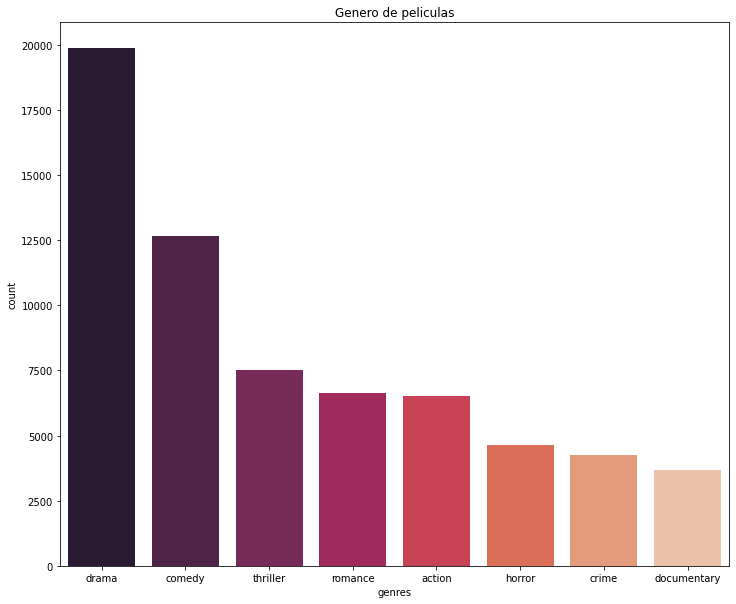

In [9]:
# Graficamos para mejor visualización
plt.figure(figsize=(12,10))
sns.countplot(x='genres', data=data, palette='rocket', order=data['genres'].value_counts().index[0:8])
plt.title('Genero de peliculas')

In [10]:
# Vizualizar cuantos datos y su porcentaje del total por país
data['production_countries'] = data['production_countries'].apply(literal_eval)
data = data.explode('production_countries')
count = data['production_countries'].value_counts()
percent = 100 * data['production_countries'].value_counts(normalize=True)
pd.DataFrame({'count': count, 'percent': percent.round(1)})

,count,percent
production_countries,,
united states of america,46878,44.8
united kingdom,9147,8.7
france,7532,7.2
germany,4454,4.3
japan,3966,3.8
...,...,...
barbados,1,0.0
tanzania,1,0.0
somalia,1,0.0


Text(0.5, 1.0, 'Paises que mas peliculas realizan')

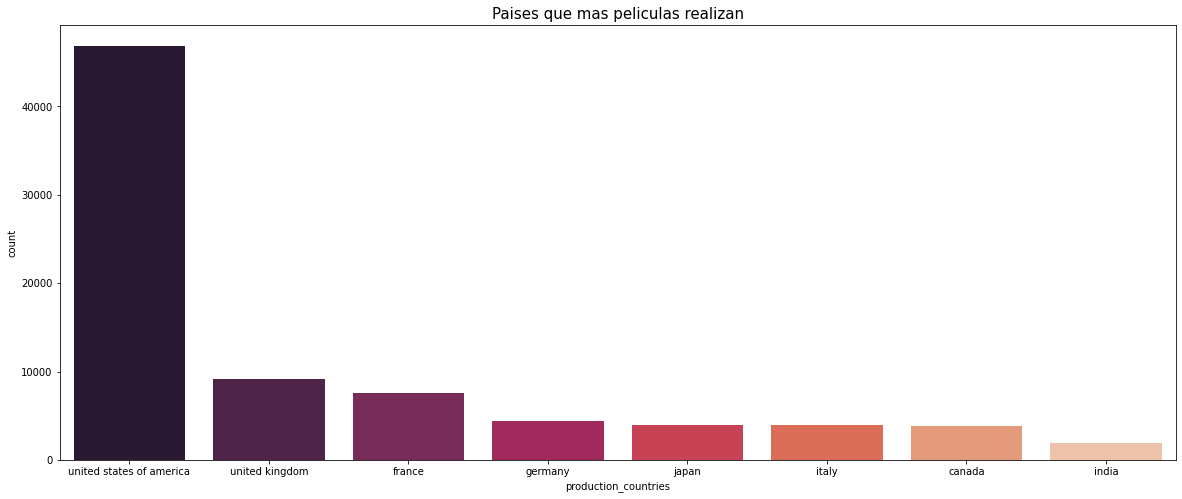

In [11]:
# Graficamos para mejor visualización
plt.figure(figsize=(20,8))
sns.countplot(x='production_countries', data=data, palette='rocket', order=data['production_countries'].value_counts().index[0:8])
plt.title('Paises que mas peliculas realizan', fontsize=15)

Text(0.5, 1.0, 'Ganancia recaudado por año')

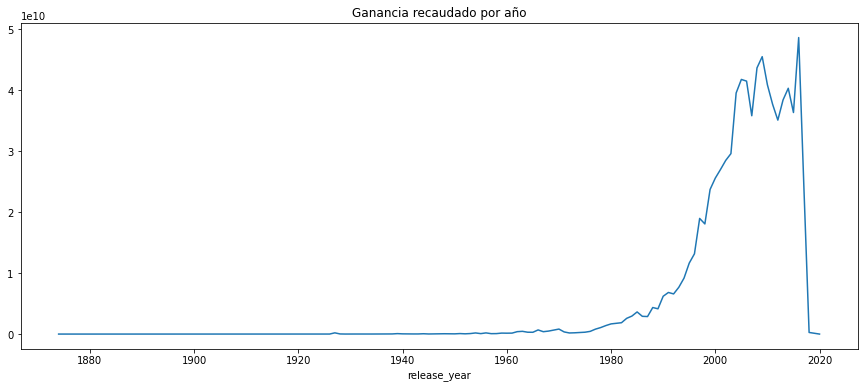

In [12]:
# Como Premisa del problema se ha tomado la feature "budget" como ganacia
# graficamos el comportamiento histórico de las gancias anuales
release_year = data.groupby(['release_year']).sum()
release_year = release_year.sort_index()

plt.figure(figsize=(15,6))
sns.lineplot(x=release_year.index, y= release_year['budget'].values)
plt.title('Ganancia recaudado por año')

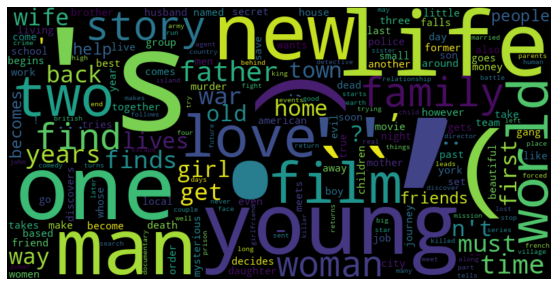

In [13]:
# Las palabras más usadas en las revisiones
def text_wordcloud(textos):
    # Se obtienen las preposisciones en ingles
    stop_words = set(stopwords.words('english'))

    # Se unifica el string
    texto_combinado = ' '.join(map(str, textos))

    # Se tokenizan las palabras
    tokenizacion = word_tokenize(texto_combinado)

    # Se hacen en minusculas
    filtered_words = [word.lower() for word in tokenizacion if word.lower() not in stop_words]

    # Se crea la distribución de frecuencia
    dist_frec = nltk.FreqDist(filtered_words)
    # Se crea la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(dist_frec)

    # Visualización de la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Se combina el texto de toda la columna
all_text = data['overview'].tolist()

# Se aplica la función al texto
text_wordcloud(all_text)

### Análisis de los resultados observados:

1. Historicamente el genero de `Drama` es el que más se ha realizado con un 22.3 % del total.
2. Los Generos `Drama` y `Comedia` son los que se han producido principalmente sumando entre los dos 36.5 %.
3. El país con mayor producción cinematográfica historicamente es `Estados Unidos de América` con un 44.8 %.
4. Los ingresos por producción cinematográfica a evolucionado en tres períodos bien definidos:
    * Desde los inicios has 1980 con un comportamiento muy estable por debajo de los 10.000 MM de Dolares.
    * A partir de la decada de los 80 se observa un crecimiento muy fuerte con una pendiente muy alta ubicandose con ganacias sobre los 40.000 MM de dolares.
    * Para el año 2019 se observa una caida muy fuerte desplomandose las ganancias en solo dos años desde los 40.000 MM de dolares hasta casi 0. esta caida se podría presumir que es a consecuencia del periodo de pandemia COVID-19 sin embargo la determinación de éste fenomeno no es materia para este estudio.
5. Se realiza una nube de palabras en el campo `overview` con el fin de identificar de manera gráfica cuales son las más usadas en este campo,  resaltando `young`, `film`, `life`, `love` entre otras. 
    
**Nota**: La columna 'budget' fue imputada con valores arbitrarios por requerimientos en el enunciado del problema lo que pudiese introducir errores importantes en éste análisis.

## <span style="color:green">Final EDA</span>